#Bayesian Classification

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
import time
from mlxtend.plotting import plot_decision_regions
#import other modules here

In [3]:
# Generate synthetic dataset with 2 classes
X, y = make_classification(n_samples=300, n_features=2, n_redundant=0, random_state=31)

In [4]:
#your code here
X.shape, y.shape

((300, 2), (300,))

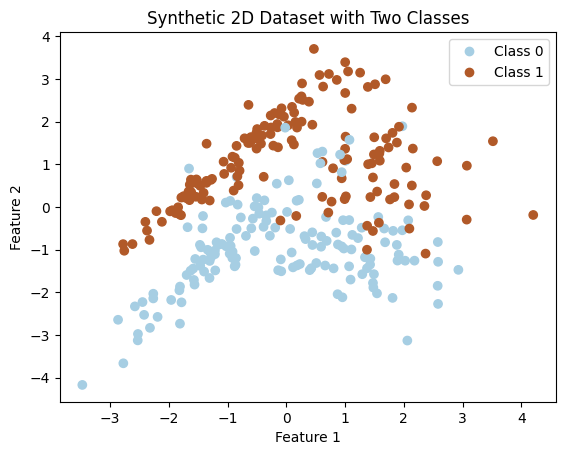

In [5]:
# Plot the synthetic dataset
scatter_train = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic 2D Dataset with Two Classes')
plt.legend(handles=scatter_train.legend_elements()[0], labels=['Class 0', 'Class 1'])

#Fit two 2D normal distributions to `X[y==0,:]` and `X[y==1,:]`

Probability density function for multivariate normal (Gaussian) distribution $N(\mu,\Sigma)$ is given by
$$
p(x_1,\ldots,x_n) = \frac{1}{\sqrt{(2\pi)^n|\Sigma|}} e ^{-\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu)}.
$$
$\mu$ is an $n$-dimentional vector representing mean and $\Sigma$ is a covariance matrix. In 2D case,
$$
\Sigma = \begin{pmatrix} \sigma^2_1 & cov(X_1,X_2)\\ cov(X_1,X_2) & \sigma_2^2 \end{pmatrix} = \begin{pmatrix} Var(X_1) & cov(X_1,X_2)\\ cov(X_1,X_2) & Var(X_2) \end{pmatrix}.
$$

In [6]:
from scipy.stats import multivariate_normal

In [15]:
mu0 = X[y==0,:].mean(axis=0)

In [16]:
sigma0 = np.cov(X[y==0,:].T)

**Problem 1.** Compute $\mu_1$ and $\Sigma_1$ for class 1.

In [29]:
mu1 =

In [30]:
sigma1 =

**Problem 2.** Add in the plot below the level curves for the Gaussian distribution over class 1 $p(x|y=1)=N(\mu_1,\Sigma_1)$.  

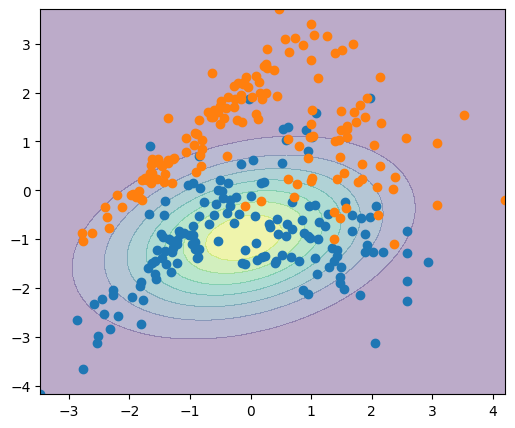

In [28]:
xx = np.linspace(min(X[:,0]), max(X[:,0]))
yy = np.linspace(min(X[:,1]), max(X[:,1]))
X_gr, Y_gr = np.meshgrid(xx, yy)
XX = np.dstack((X_gr, Y_gr))
Z0 = multivariate_normal.pdf(XX, mean=mu0, cov=sigma0)

plt.figure(figsize= (6,5))
plt.contourf(xx, yy, Z0, alpha=0.2)
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])

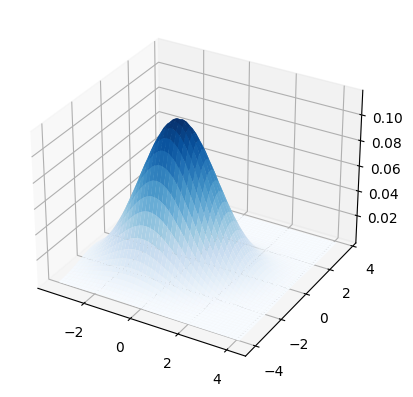

In [18]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
from matplotlib import cm
ax.plot_surface(XX[:,:,0], XX[:,:,1], Z0, cmap=cm.Blues)
#ax.plot_surface(XX[:,:,0], XX[:,:,1], Z1)

**Problem 3.** Compute distribution of the target $p(y),$ i.e., $p_0=P(Y=0)$ and $p_1=P(Y=1)$. You may use `np.unique(y, return_counts=True)`

In [20]:
labels, counts =

In [21]:
p0, p1 = counts/len(y)

Now, we calculate
$$
y_{pred} = argmax \{p(y=0|x),\ p(y=1|x)\}  
$$
Instead of the maximum of the true probability
$$
p(y=0|x) = \frac{p(x,y)}{p(x)} = \frac{p(x|y=0)p(y=0)}{p(x)}
$$
we can look at the numerater only (because $x$ is fixed)
$$
y_{pred} = argmax \{p(x,y=0),\ p(x,y=1)\}.  
$$

In [31]:
y_pred = np.argmax(np.dstack((multivariate_normal.pdf(X, mean=mu0, cov=sigma0)*p0, multivariate_normal.pdf(X, mean=mu1, cov=sigma1)*p1))[0], axis=1)

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
accuracy_score(y,y_pred)

0.84

**Problem 4.** Compute Naive Bayes prediction and accuracy. Instead of $p(x|y=0) = N(\mu_0, \Sigma_0),$ with $\mu_0=(\mu_{0,x_1}, \mu_{0,x_2})$ use
$$
p(x|y=0)= p(x_1|y=0)p(x_2|y=0) = N(\mu_{0,x_1}, \Sigma_{0,x_1})N(\mu_{0,x_2}, \Sigma_{0,x_2}),
$$

Instead  `multivariate_normal.pdf(X, mean=mu0, cov=sigma0)` you can use `multivariate_normal.pdf(X[:0], mean=mu0[0], cov=sigma0[0][0])*multivariate_normal.pdf(X[:1], mean=mu0[1], cov=sigma0[1][1])`